## 머신러닝 실습

### 머신러닝 개요

- AI > ML > DL : AI는 모든 것을 다 포괄하는 개념

#### 인공지능 개발 파이썬 프레임워크
- Numpy, Scipy
- Pandas
- Matplotlib
- Ploty : Matplotlib 대체할 수 있는 시각화 라이브러리
- Scikit-learn(sklearn) : 고전적인 머신러닝 라이브러리(쉽고 빠름)
- Theano : 머신러닝용 라이브러리
- Tensorflow : 머신러닝 / 딥러닝 라이브러리, 점유율 1위
- Keras : 점유율 3위, 딥러닝을 위해서 독립개발, Tensorflow 2.0부터 병합됨
- PyTorch : 점유율 2위, 최근 급격히 성장한 딥러닝 라이브러리, 객체인식 프레임워크와 병합

##### Scikit-learn을 이용한 머신러닝
- 일반 프로그램 : 입력값 x로 출력값 y를 도출
- 머신러닝 : 입력값 x, 출력값 y를 넣어서 학습모델을 생성. 새로운 x를 학습모델에 넣으면 새로운 y를 도출

- 지도학습 : 대부분의 머신러닝은 개발자(사람)가 어떤 결과가 나온다는 것을 지도해 줌

##### 분석평가지표
- 절대값 평균오차 : MAE, mean absolute error() 사용
- 제곱 평균오차 : MSE, mean square error() 사용
- 제곱평균의 제곱근 오차 : RMSE, Scikit-Learn에 없음
- 분산비율 : Variance score, r2_score() 사용

### 보스턴 집값 가격 예측

#### 데이터 수집

##### Scikit-Learn 라이브러리 내 데이터

In [3]:
# Scikit-Learn 라이브러리 설치
!pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 3.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/10.6 MB 8.3 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.6 MB 11.2 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/10.6 MB 13.0 MB/s eta 0:00:01
   ------------ --------------------------- 3.2/10.6 MB 14.5 MB/s eta 0:00:01
   ----------------- ---------------------- 4.5/10.6 MB 17.1 MB/s eta 0:00:01
   ----------------------- ---------------- 6.2/10.6 MB 20.0 MB/s eta 0:00:01
   -------------------------------- ------- 8.6/10.6 MB 23.9 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 31.1 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 31.1 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 24.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--


In [8]:
# 필수 라이브러리 사용등록
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load_boston has been removed from scikit-learn since version 1.2.
# scikit-Learn 1.2버전 이상에서는 load_boston 없어짐
from sklearn.datasets import fetch_openml

In [9]:
# 보스턴 집값데이터 다운로드
x, y = fetch_openml('boston', return_X_y=True)

c:\DEV\Python312\Lib\site-packages\sklearn\datasets\_openml.py:322: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [13]:
x['MEDV'] = y

In [14]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [16]:
dfBostonHousing = x

In [17]:
dfBostonHousing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [18]:
dfBostonHousing.to_excel('./data/BostonHousing.xlsx', index= False)

In [19]:
dfBostonHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


##### 각 컬럼 설명
|CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|
|---|---|---|---|---|---|---|
|범죄발생률|25,000평방피트 초과 거주지역 비율|비상업지역 넓이비율|찰스강 더미변수(1:강경계,0:경계아님)|일산화질소농도|거주가능 방수|1940이전 건축 주택비율
|DIS|RAD|TAX|PTRATIO|B|LSTAT|MEDV|
|5개 주요 고용센터까지 가중거리|고속도로 접근용이도|10,000달러당 재산세 비율|지역교사와 학생수 비율|흑인거주비율|하위계층비율|가격(본인소유주택가격 중앙값)|

##### 분석모델 구축, 결과 분석
- 전체 데이터에서 보통 70~80% 훈련시 사용, 나머지 20~30% 데이터를 검증시 사용

In [20]:
## 회귀분석 모델, 함수 사용등록
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# x(독립변수, 13가지 속성들), y(종속변수, 독립변수의 영향을 받는 값)
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [42]:
# 통합데이터에서 독립변수만 다시 분리하려면
x = dfBostonHousing.drop(['MEDV'], axis=1)
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [71]:
# 훈련용 데이터와 평가(검증)용 데이터 분할
# 판다스 DF에서 순서대로 데이터를 자르면, 고가의 집 데이터가 후반부에 몰려있으면 훈련데이터와 검증데이터의 편차가 너무 심해짐(학습이 제대로 안됨)
# train_test_split() 데이터를 랜덤으로 잘라서 훈련데이터와 검증데이터를 분할
# test_size=0.3 -> 30%(조정가능), random_state=156, 105, 80 조정가능
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=142)

In [67]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
286,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241.0,18.2,341.60,12.93
256,0.01538,90.0,3.75,0,0.394,7.454,34.2,6.3361,3,244.0,15.9,386.34,3.11
349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335.0,19.7,389.85,5.89
153,2.14918,0.0,19.58,0,0.871,5.709,98.5,1.6232,5,403.0,14.7,261.95,15.79
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81
268,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264.0,13.0,390.30,3.16
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666.0,20.2,35.05,21.22
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329.0,12.6,354.31,8.61


In [50]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666.0,20.2,393.74,21.78
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666.0,20.2,376.11,20.31
479,14.33370,0.0,18.10,0,0.614,6.229,88.0,1.9512,24,666.0,20.2,383.32,13.11
175,0.06664,0.0,4.05,0,0.510,6.546,33.1,3.1323,5,296.0,16.6,390.96,5.33
255,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315.0,16.4,395.18,9.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666.0,20.2,396.90,19.77
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33
460,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,24,666.0,20.2,255.23,16.42
213,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277.0,18.6,385.81,9.38


In [46]:
y_train

393    13.8
188    29.8
378    13.1
357    21.7
419     8.4
       ... 
228    46.7
73     23.4
278    29.1
117    19.2
192    36.4
Name: MEDV, Length: 354, dtype: float64

In [51]:
# 검증데이터 실제 가격 값
y_test

379    10.2
402    12.1
479    21.4
175    29.4
255    20.9
       ... 
403     8.3
500    16.8
460    16.4
213    28.1
438     8.4
Name: MEDV, Length: 152, dtype: float64

In [52]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
393,8.64476,0.0,18.10,0,0.693,6.193,92.6,1.7912,24,666.0,20.2,396.90,15.17
188,0.12579,45.0,3.44,0,0.437,6.556,29.1,4.5667,5,398.0,15.2,382.84,4.56
378,23.64820,0.0,18.10,0,0.671,6.380,96.2,1.3861,24,666.0,20.2,396.90,23.69
357,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666.0,20.2,391.34,13.27
419,11.81230,0.0,18.10,0,0.718,6.824,76.5,1.7940,24,666.0,20.2,48.45,22.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.29819,0.0,6.20,0,0.504,7.686,17.0,3.3751,8,307.0,17.4,377.51,3.92
73,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,4,305.0,19.2,377.17,7.54
278,0.07978,40.0,6.41,0,0.447,6.482,32.1,4.1403,4,254.0,17.6,396.90,7.19
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432.0,17.8,394.51,10.30


In [60]:
# 선형회귀 모델 생성
lr = LinearRegression()

In [72]:
# 선형회귀 모델 훈련
lr.fit(x_train, y_train)

LinearRegression()

In [73]:
# 선형회귀 분석 : 검증(평가) 데이터를 넣어서 예측 수행
## Numpy배열로 변경하고 테스트
y_predict = lr.predict(np.array(x_test))

c:\DEV\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [74]:
# 선형회귀모델로 예측값
y_predict

array([15.76204603, 21.10359221, 19.79056236, 22.43453899,  4.96953604,
       22.45902507, 26.87329611, 15.83135905, 20.58362379, 21.14268114,
       19.24480935, 22.8624206 , 16.77931396, 27.09609979, 18.72968749,
       25.86891848, 31.83802692, 15.87013626, 15.87661376, 23.3664703 ,
        5.88481767, 29.83413749, 16.40366841, 20.27778142, 25.26453689,
       23.70916027, 25.58773891, 23.06419554, 27.12064352, 25.83153311,
       26.45638613, 21.40360131, 22.87329098, 11.12555794,  7.43690257,
        7.81853944, 14.60176713, 13.11336238, 30.0943336 , 25.18603581,
       24.73801342, 23.01875606, 23.96041061,  8.25400878, 14.21263277,
       24.42342656, 42.95256261, 23.72365273, 25.12480668, 12.78616879,
       35.42200593, 30.66385837, 18.4623896 , 25.23243888, 42.81867763,
       16.27636386, 13.36377139, 24.16826354, 30.94746027, 33.71717885,
       26.62938566, 27.44321906, 44.2697419 , 20.83788396, 32.58619204,
        8.32154806, 25.08244743, 14.50820786,  9.06935211, 31.35

In [75]:
## 제곱평균오차로 평가
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse) # Numpy에 있는 squareroot 함수 사용하면 구해짐
r2 = r2_score(y_test, y_predict)

print(f'MSE = {mse}') # 거의 오차가 없음
print(f'RMSE = {rmse}')
print(f'R^2(Variance score) = {r2}')

MSE = 20.653330570059133
RMSE = 4.544593553890065
R^2(Variance score) = 0.7145719280624717


In [79]:
## y절편값, 회귀계수값
print(f'Y절편값 = {lr.intercept_}')
print(f'회귀계수값 = {np.round(lr.coef_,1)}')

Y절편값 = 38.04207155170518
회귀계수값 = [ -0.1   0.    0.    2.4 -16.9   3.7   0.   -1.4   0.3  -0.   -1.    0.
  -0.6]


In [80]:
pd.Series(data=np.round(lr.coef_,2), index=x.columns)

CRIM       -0.08
ZN          0.04
INDUS       0.02
CHAS        2.42
NOX       -16.91
RM          3.69
AGE         0.01
DIS        -1.36
RAD         0.30
TAX        -0.01
PTRATIO    -1.04
B           0.01
LSTAT      -0.61
dtype: float64

##### 회귀계수, 절편이 필요한 이유
- 선형회귀 방정식(회귀식) 도출
$$Y_{medv} = -0.11x_{CRIM} + 0.07x_{ZN} + 0.03x_{INDUS} + 3.05x_{CHAS} -19.8x_{NOX} + 3.35x_{RM} + 0.01x_{AGE} \\
                -1.74x_{DIS} +0.36x_{RAD} -0.01x_{TAX} =0.92x_{PARTIO} + 0.01x_{B} - 0.57x_{LSTAT} + 40.996$$


##### 각각의 독립변수와 종속변수 MEDV 간의 상관관계 산점도

In [86]:
list(x.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [92]:
dfBostonHousing['CHAS'] = dfBostonHousing['CHAS'].astype('int32')

In [95]:
dfBostonHousing['RAD'] = dfBostonHousing['RAD'].astype('int32')

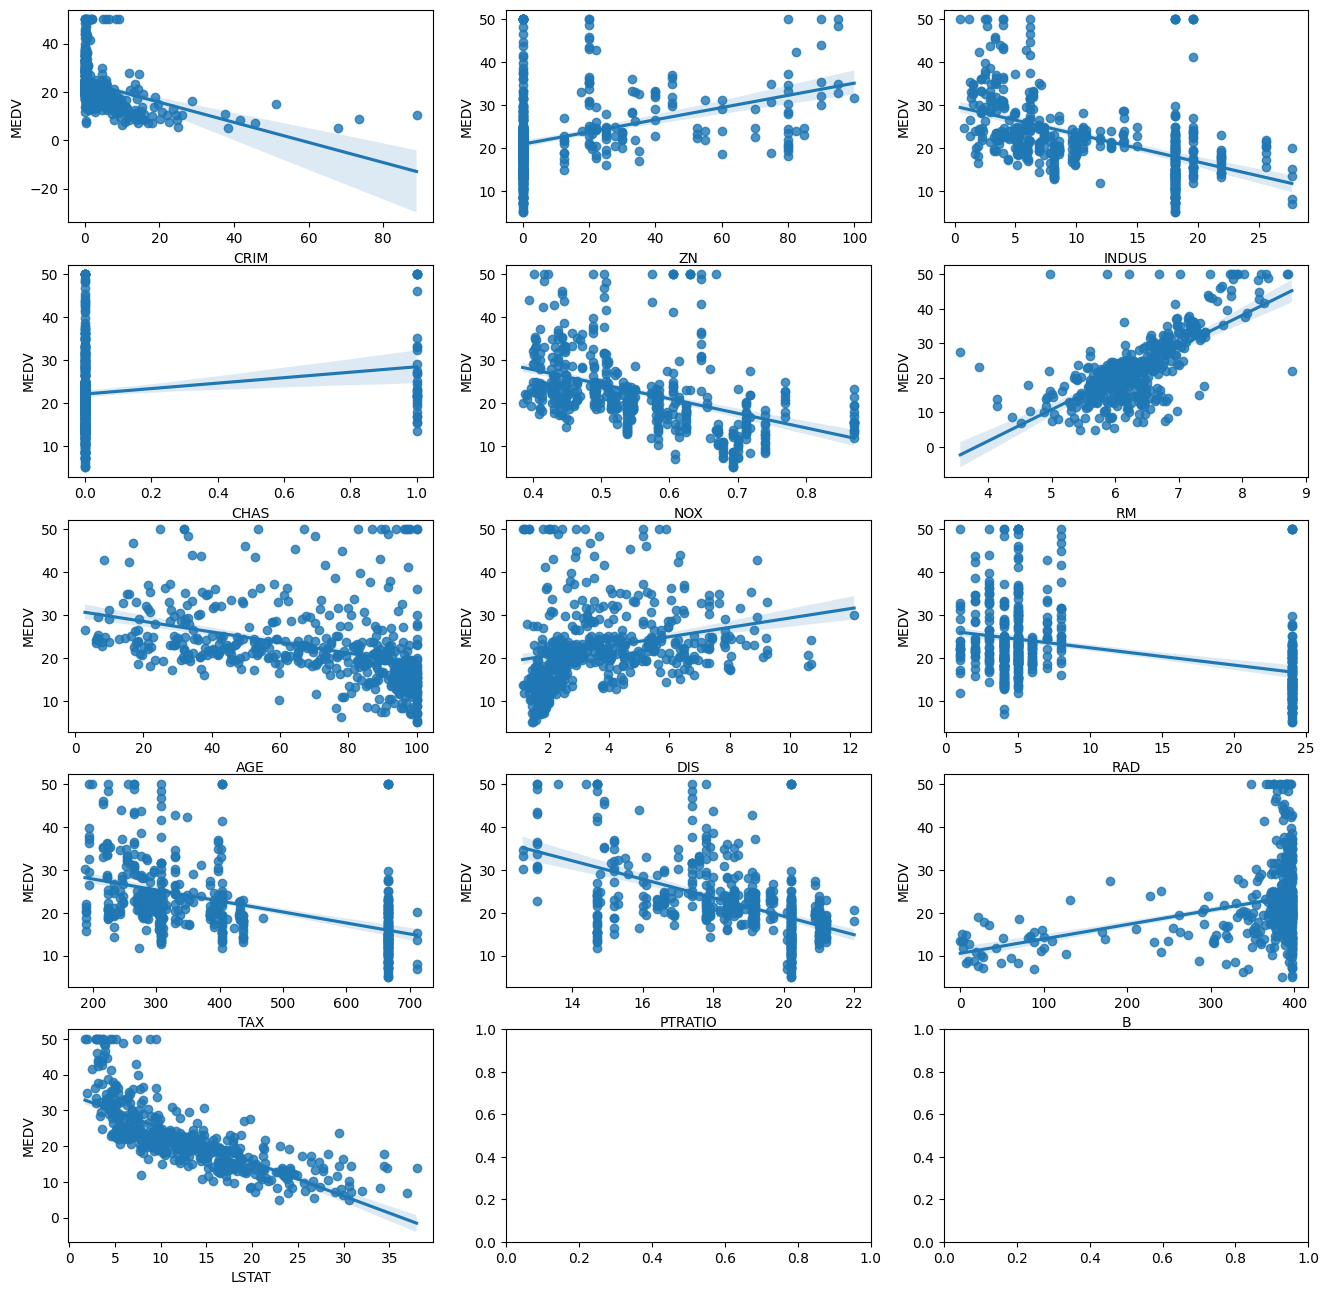

In [97]:
fig, axs = plt.subplots(figsize= (16,16), ncols= 3, nrows= 5)

# dType이 Category인 변수를 astype()로 형변환
x_features = list(x.columns)

for i , feat in enumerate(x_features):
    row = i // 3
    col = i % 3
    sns.regplot(data= dfBostonHousing, x= feat, y= 'MEDV', ax= axs[row][col])

plt.show()

##### 결론
- 13가지의 독립변수 중 가격과 높은 상관관계가 있는 것
    - RM : 방의 개수가 많으면 그 주변 집값은 비쌈
    - LSTAT : 하위 계층이 많이 살고 있으면 그 주변 집값은 낮다